# Medical Appointment No Shows Capstone

## 5. MODELING
> "All models are wrong, but some are useful." – George Box

In [169]:
#Import necessary libraries
import pandas as pd
import numpy as np

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


# Analysing datetime
from datetime import datetime as dt

# File system manangement
import os,sys

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [19]:
#SKLEARN 

#MODEL_SELECTION
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier

#LINEAR_MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge


#ENSEMBLE 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

#SVM
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#METRICS
from sklearn.metrics import r2_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix



#PIPELINE 
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline as mpl

import pandas.util.testing as tm
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [20]:
#SCIPY
from scipy.stats import randint

## Load Data

In [4]:
path = 'data/df_ohe.csv'
df_ohe = pd.read_csv(path, index_col=None) 
df_ohe.sample(5)

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,WaitingDays,ScheduledHour,ScheduledDay_Y,...,AppointmentDayWeekName_5,ScheduledDayMonthName_1,ScheduledDayMonthName_2,ScheduledDayMonthName_3,ScheduledDayMonthName_4,ScheduledDayMonthName_5,ScheduledDayMonthName_6,ScheduledDayMonthName_7,AppointmentDayMonthName_1,AppointmentDayMonthName_2
109902,56,0,1,1,1,0,0,1,7,2016,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
76484,6,0,0,0,0,0,0,0,7,2016,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
46268,68,0,1,0,0,0,1,5,14,2016,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
101532,14,0,0,0,0,0,1,28,6,2016,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6626,30,0,0,0,0,0,0,1,13,2016,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Train/Test Data

In [5]:
X = df_ohe.drop(['NoShow_1'], axis = 1)
y = df_ohe['NoShow_1']

SEED = 42
TS = 0.25

# Create training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = TS, random_state=SEED, stratify=y)

#Feature Scaling to prevent information leakage
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(82887, 112)
(82887,)
(27630, 112)
(27630,)


___

# 1. K-NEAREST NEIGHBORS
- Model That classifies data based on its distance to training set data. A new data point is assigned a label based on the class that the majority of surrounding data points belong to. 
- “The k-nearest neighbors algorithm (KNN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression”-Wikipedia

In [160]:
MODEL_PARAMS = {
    "n_neighbors": 5,
    "weights":'uniform',
    "algorithm": 'auto',
    "leaf_size":30,
    "p":2,
    "metric":'minkowski'
}

steps = [('knn', KNeighborsClassifier(**MODEL_PARAMS) )]

pipeline = Pipeline(steps)

# Fit/Train the classifier to the Training data.
pipeline.fit(X_train,y_train)  

# Predict the labels for the training data X
y_pred = pipeline.predict(X_test)  
y_pred_proba = pipeline.predict_proba(X_test)[:,1]

# Generate the confusion matrix and classification report
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))


knn_score = round(knn.score(X_train, y_train) * 100, 2)
print("KNN Score:", knn_score)

knn_test_score = round(knn.score(X_test, y_test) * 100, 2)
print("KNN Test Score:", knn_score)


#Checking performance on our model with ROC Score.
knn_roc_score = round(roc_auc_score(y_test,y_pred_proba)*100,3)
print("ROC Score:", knn_roc_score)

Pipeline(steps=[('knn', KNeighborsClassifier())])

Confusion Matrix 
 [[20383  1668]
 [ 4451  1128]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87     22051
         1.0       0.40      0.20      0.27      5579

    accuracy                           0.78     27630
   macro avg       0.61      0.56      0.57     27630
weighted avg       0.74      0.78      0.75     27630

KNN Score: 83.75
KNN Test Score: 83.75
ROC Score: 65.983


#### Overfitting and underfitting

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
param_grid = {'n_neighbors': np.arange(1,200)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid,cv=5)
knn_cv.fit(X_train,y_train)
knn_cv.best_params_

___

# 2. Logistic Regression Model
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In [205]:
MODEL_PARAMS = {
    "solver":'lbfgs',
    "penalty":'l2',
    "n_jobs":None,
    "verbose":0,
    #"max_iter":200  
}

# Create logistic regression model
logreg = LogisticRegression(**MODEL_PARAMS)

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_test_score = round(logreg.score(X_test, y_test) * 100, 2)

print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_test_score)

print('Accuracy: \n', accuracy_score(y_test,y_pred))

#Checking performance on our model with ROC Score.
logreg_roc_score = round(roc_auc_score(y_test, y_pred_proba)*100,3)
print("ROC Score:", logreg_roc_score)

LogisticRegression()

[[22002    49]
 [ 5529    50]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     22051
         1.0       0.51      0.01      0.02      5579

    accuracy                           0.80     27630
   macro avg       0.65      0.50      0.45     27630
weighted avg       0.74      0.80      0.71     27630

Logistic Regression Training Score: 
 79.75
Logistic Regression Test Score: 
 79.81
Accuracy: 
 0.7981179876945349
ROC Score: 71.421


In [207]:
# 10-fold cross-validation scores:
cv_scores = cross_val_score(logreg, X_train, y_train, cv=10,scoring='roc_auc').mean()
print(cv_scores*100)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

71.39965783205375
Average 5-Fold CV Score: 0.7139965783205375


#### Plot ROC curve

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

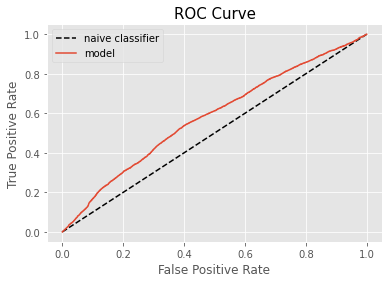

In [208]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr, thresholds = roc_curve(y_test,y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='naive classifier')
plt.plot(fpr,tpr, label='model')



plt.legend(prop={'size':10})
plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.title('ROC Curve', size=15)
plt.show()

___

## 3. Gaussian Naive Bayes

In [211]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

#Predict Output
y_pred = gaussian.predict(X_test)
y_pred_prob = gaussian.predict_proba(X_test)[:,1]

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_test_score = round(gaussian.score(X_test, y_test) * 100, 2)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_test_score)
print('Accuracy: \n', accuracy_score(y_test,y_pred))

#Checking performance on our model with ROC Score.
gauss_roc_score = round(roc_auc_score(y_test, y_pred_prob)*100,3)
print("ROC Score:", gauss_roc_score)

GaussianNB()

[[ 2147 19904]
 [  406  5173]]
              precision    recall  f1-score   support

         0.0       0.84      0.10      0.17     22051
         1.0       0.21      0.93      0.34      5579

    accuracy                           0.26     27630
   macro avg       0.52      0.51      0.26     27630
weighted avg       0.71      0.26      0.21     27630

Gaussian Score: 
 26.75
Gaussian Test Score: 
 26.49
Accuracy: 
 0.26492942453854507
ROC Score: 57.992


___

# Boosting
- Boosting: Ensemble method combining several weak learners to form a strong learner.
- Weak learner: Model doing slightly better than random guessing.
* Example of weak learner: Decision stump (CART whose maximum depth is 1).


# 4. AdaBoost Model

In [212]:
MODEL_PARAMS = {
    "max_depth": 1,
    "random_state": SEED
}

dt = DecisionTreeClassifier(**MODEL_PARAMS)

adb = AdaBoostClassifier(base_estimator=dt,n_estimators=100)

adb.fit(X_train,y_train)

y_pred = adb.predict(X_test)
y_pred_proba = adb.predict_proba(X_test)[:,1]

# Generate the confusion matrix and classification report
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))

adb_score = round(adb.score(X_train, y_train) * 100, 2)
adb_test_score = round(adb.score(X_test, y_test) * 100, 2)

print('AdaBoost Training Score: ', adb_score)
print('AdaBoost Test Score: ', adb_test_score)

#Checking performance on our model with ROC Score.
adb_roc_score = round(roc_auc_score(y_test, y_pred_proba)*100,3)
print("ROC Score:", adb_roc_score)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   n_estimators=100)

Confusion Matrix 
 [[21958    93]
 [ 5501    78]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     22051
         1.0       0.46      0.01      0.03      5579

    accuracy                           0.80     27630
   macro avg       0.63      0.50      0.46     27630
weighted avg       0.73      0.80      0.71     27630

AdaBoost Training Score:  79.81
AdaBoost Test Score:  79.75
ROC Score: 72.025


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

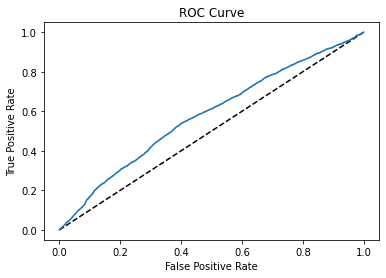

0.5799234626366687

In [89]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr, thresholds = roc_curve(y_test,y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc(fpr, tpr)

## 5. Gradient Boosting

In [217]:
MODEL_PARAMS = {
    "max_depth":4,
    "n_estimators":300,
    "random_state":SEED
}

gb = GradientBoostingClassifier(**MODEL_PARAMS)

# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:,1]

# Generate the confusion matrix and classification report
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))

#Training And Testing Scores
gb_score = round(gb.score(X_train, y_train) * 100, 2)
gb_test_score = round(gb.score(X_test, y_test) * 100, 2)

print('Gradient Boosting Training Score: ', gb_score)
print('Gradient Boosting Test Score: ', gb_test_score)


#Checking performance on our model with ROC Score.
gb_roc_score = round(roc_auc_score(y_test, y_pred_proba)*100,3)
print("ROC Score:", gb_roc_score)

GradientBoostingClassifier(max_depth=4, n_estimators=300, random_state=42)

Confusion Matrix 
 [[21855   196]
 [ 5327   252]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.80      0.99      0.89     22051
         1.0       0.56      0.05      0.08      5579

    accuracy                           0.80     27630
   macro avg       0.68      0.52      0.49     27630
weighted avg       0.76      0.80      0.73     27630

Gradient Boosting Training Score:  80.65
Gradient Boosting Test Score:  80.01
ROC Score: 74.09


### Stochastic Gradient Boosting
- Each Tree is trained on a random subset of rows of the training data.

In [100]:
sgbt = GradientBoostingClassifier(subsample=0.9,
                                  max_depth=4, 
                                  n_estimators=300,
                                  random_state=SEED)
sgbt.fit(X_train,y_train)
y_pred = sgbt.predict(X_test)
y_pred_proba = sgbt.predict_proba(X_test)[:,1]

sgbt_score = round(sgbt.score(X_train, y_train) * 100, 2)
sgbt_test_score = round(sgbt.score(X_test, y_test) * 100, 2)

print('XGBoost Training Score: ', sgbt_score)
print('XGBoost Test Score: ', sgbt_test_score)

#Checking performance on our model with ROC Score.
sgbt_roc_score = round(roc_auc_score(y_test, y_pred_proba)*100,3)
print("ROC Score:", sgbt_roc_score)

GradientBoostingClassifier(max_depth=4, n_estimators=300, random_state=42,
                           subsample=0.9)

XGBoost Training Score:  80.76
XGBoost Test Score:  80.11
ROC Score: 74.306


## 6. XGBOOST

In [167]:
MODEL_PARAMS = {
    "base_score":0.5,
    "booster":'gbtree',
    "colsample_bytree":1,
    "gamma": 0,
    "learning_rate": 0.1,
    "n_estimators": 100,
    "max_depth": 6,
    "objective": 'binary:logistic',
    "min_child_weight":1,
    "subsample":0.8,
    "random_state":SEED,
    "scale_pos_weight":1,
    "nthread":4,
    "n_jobs":0,
    "seed": SEED,
    "validate_parameters":1,
    "verbosity":None,
}
xgb = XGBClassifier(**MODEL_PARAMS)

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("Accuracy: %.2f" % (accuracy*100),"%")

xgb_score = round(xgb.score(X_train, y_train) * 100, 2)
xgb_test_score = round(xgb.score(X_test, y_test) * 100, 2)

print('XGBoost Training Score: ', xgb_score)
print('XGBoost Test Score: ', xgb_test_score)

#Checking performance on our model with ROC Score.
xgb_roc_score = round(roc_auc_score(y_test, y_pred_proba)*100,3)
print("ROC Score:", xgb_roc_score)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy: 80.06 %
XGBoost Training Score:  80.45
XGBoost Test Score:  80.06
ROC Score: 74.403


## 7. Decision Tree Model

#### Gini Criterion

In [199]:
MODEL_PARAMS = {
    "criterion": "gini",
    "random_state":SEED,
    #"max_depth": 7,
}
dtc = DecisionTreeClassifier(**MODEL_PARAMS)

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
dtc.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = dtc.predict(X_test)
y_pred_proba = dtc.predict_proba(X_test)[:,1]

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

print(dtc)

dtc_score = round(gb.score(X_train, y_train) * 100, 2)
dtc_test_score = round(gb.score(X_test, y_test) * 100, 2)

print('Decision Tree Training Score: ', dtc_score)
print('Decision Tree  Test Score: ', dtc_test_score)

#Checking performance on our model with ROC Score.
dtc_roc_score = round(roc_auc_score(y_test, y_pred_proba)*100,3)
print("ROC Score:", dtc_roc_score)

DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(random_state=42)
Decision Tree Training Score:  80.65
Decision Tree  Test Score:  80.01
ROC Score: 58.722


In [201]:
#Hyperparameter tuning with RandomizedSearchCV
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8943b79210>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8943b79a10>})

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 4}
Best score is 0.7981106816489578


In [203]:
MODEL_PARAMS = {
    "criterion":"gini",
    "random_state":SEED,
    "max_depth": 5,
    "max_features":1,
    "min_samples_leaf":4,
}
dtce = DecisionTreeClassifier(**MODEL_PARAMS)

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
dtce.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = dtc.predict(X_test)
y_pred_proba = dtce.predict_proba(X_test)[:,1]

print(dtc)

dtce_score = round(dtce.score(X_train, y_train) * 100, 2)
dtce_test_score = round(dtce.score(X_test, y_test) * 100, 2)

print('Decision Tree Training Score: ', dtce_score)
print('Decision Tree  Test Score: ', dtce_test_score)

#Checking performance on our model with ROC Score.
dtc_roc_score = round(roc_auc_score(y_test, y_pred_proba)*100,3)
print("ROC Score:", dtc_roc_score)

DecisionTreeClassifier(max_depth=5, max_features=1, min_samples_leaf=4,
                       random_state=42)

DecisionTreeClassifier(random_state=42)
Decision Tree Training Score:  79.81
Decision Tree  Test Score:  79.78
ROC Score: 51.264


## 8. Bagging Classifier

In [95]:
dt = DecisionTreeClassifier(random_state=SEED)


bgc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=SEED)

bgc.fit(X_train, y_train)

y_pred = bgc.predict(X_test)
y_pred_proba = bgc.predict_proba(X_test)[:,1]

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

bgc_score = round(bgc.score(X_train, y_train) * 100, 2)
bgc_test_score = round(bgc.score(X_test, y_test) * 100, 2)

print('BaggingClassifier Training Score:', bgc_score)
print('BaggingClassifier Test Score:', bgc_test_score)

#Checking performance on our model with ROC Score.
bgc_roc_score = round(roc_auc_score(y_test, y_pred_proba)*100,3)
print("ROC Score:", bgc_roc_score)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=50, random_state=42)

Test set accuracy of bc: 0.80
BaggingClassifier Training Score: 99.69
BaggingClassifier Test Score: 79.82
ROC Score: 73.173


## 9. Random Forest Model

#### Default Gini criterion

In [194]:
MODEL_PARAMS = {
    "n_estimators": 100,
    "criterion": 'gini',
    "max_features":'sqrt',
    "random_state":SEED
}

rf = RandomForestClassifier(**MODEL_PARAMS)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]



rf_score = round(rf.score(X_train, y_train) * 100, 2)
rf_test_score = round(rf.score(X_test, y_test) * 100, 2)

print('Random Forest Training Score:', rf_score)
print('Random Forest Test Score:', rf_test_score)


#Checking performance on our model with ROC Score.
rf_roc_score = round(roc_auc_score(y_test,y_pred_proba)*100,3)
print("ROC Score:", rf_roc_score)

RandomForestClassifier(max_features='sqrt', random_state=42)

Random Forest Training Score: 99.75
Random Forest Test Score: 80.2
ROC Score: 74.477


#### Entropy criterion

In [222]:
MODEL_PARAMS = {
    "n_estimators": 300,
    "criterion": 'entropy',
    "max_depth": None,
    "min_samples_split":2,
    "min_samples_leaf":1,
    "min_weight_fraction_leaf":0.0,
    "max_features":'auto',
    "max_leaf_nodes":None,
    "min_impurity_decrease":0.0,
    "min_impurity_split":None,
    "bootstrap":True,
    "oob_score":False,
    "n_jobs":None,
    "random_state": SEED,
    "verbose":0,
    "warm_start":False,
    "class_weight":None,
    "ccp_alpha":0.0,
    "max_samples":None,
}

rf = RandomForestClassifier(**MODEL_PARAMS)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]



rf_score = round(rf.score(X_train, y_train) * 100, 2)
rf_test_score = round(rf.score(X_test, y_test) * 100, 2)

print('Random Forest Training Score:', rf_score)
print('Random Forest Test Score:', rf_test_score)


#Checking performance on our model with ROC Score.
rf_roc_score = round(roc_auc_score(y_test,y_pred_proba)*100,3)
print("ROC Score:", rf_roc_score)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=42)

Random Forest Training Score: 99.75
Random Forest Test Score: 80.39
ROC Score: 74.872


___

# Model Evaluation

In [197]:
models = pd.DataFrame({
    
    'Model': [ 
        'k-Nearest Neighbors',
        'Logistic Regression',
        'Gaussian Naive Bayes',
        'AdaBoost',
        'Gradient Boosting',
        'XGBoost',
        'Decision Tree',
        'Bagging Classifier',
        'Random Forest',
        
    ],
    
    
    'ROC-AUC Score': [ 
        knn_roc_score, 
        logreg_roc_score,
        gauss_roc_score,
        adb_roc_score,
        gb_roc_score,
        xgb_roc_score,
        dtc_roc_score,
        bgc_roc_score,
        rf_roc_score
    ],             
    
    'Score': [ 
        knn_score, 
        logreg_score,
        gauss_score,
        adb_score,
        gb_score,
        xgb_score,
        dtc_score,
        bgc_score,
        rf_score
    ],
    
    'Test Score': [ 
        knn_test_score,
        logreg_test_score,
        gauss_test_score,
        adb_test_score,
        gb_test_score,
        xgb_test_score,
        dtc_test_score,
        bgc_test_score,
        rf_test_score
    ]})


models.sort_values(by='ROC-AUC Score', ascending=False)

,Model,ROC-AUC Score,Score,Test Score
8,Random Forest,74.872,99.75,80.39
5,XGBoost,74.403,80.45,80.06
4,Gradient Boosting,74.090,80.65,80.01
7,Bagging Classifier,73.173,99.69,79.82
3,AdaBoost,72.025,79.81,79.75
1,Logistic Regression,71.421,79.75,79.81
0,k-Nearest Neighbors,65.983,83.75,77.85
2,Gaussian Naive Bayes,57.992,26.75,26.49
6,Decision Tree,53.785,80.65,80.01


In [181]:
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=SEED)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

classifiers = [
    ('KNN', knn),
    ('Logistic Regression', lr),
    ('Decision Tree', dt),
    ('Random forest', rf)
]

print('ROC Score:\n')
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    
    # Calculate accuracy
    accuracy = roc_auc_score(y_test,y_pred_proba) 
    print('[{:s}] : {:.3f}%'.format(clf_name, accuracy * 100))

Accuracy Score:



KNeighborsClassifier()

[KNN] : 65.983%


LogisticRegression(random_state=42)

[Logistic Regression] : 71.421%


DecisionTreeClassifier()

[Decision Tree] : 58.892%


RandomForestClassifier()

[Random forest] : 74.584%
